In [1]:
%load_ext watermark
%watermark -a "Teresiah Kahura" -d -t -v -p numpy,pandas,matplotlib -g

Teresiah Kahura 2020-08-07 03:53:53 

CPython 3.7.3
IPython 7.16.1

numpy 1.18.5
pandas 0.24.2
matplotlib 3.0.3
Git hash: 26f5332e6506f83cc12a9d8f7aadc88994e7ef23


In [2]:
from __future__ import print_function
%matplotlib inline

import os

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import sequence

import re
import string

PROJ_ROOT = os.path.join(os.pardir, os.pardir)

In [3]:
def load_data(reviews_path):
    
    df1 = pd.read_csv(reviews_path)
    
    
    return df1

reviews_path = os.path.join(PROJ_ROOT, "data", "raw", "book_reviews.csv")
    
df1 = load_data(reviews_path)   

assert df1.shape == (2808, 2)

In [4]:
df1.head()

,text,label
0,Fascinating view into the past: This book is f...,__label__2
1,A very amusing look at the past: I was hoping ...,__label__2
2,Didn't like...: I didn't like this version of ...,__label__1
3,"Two Divas,that should shut up!: Here are two s...",__label__1
4,Movie Version is Much better!: The movie versi...,__label__1


In [5]:
df1.tail()

,text,label
2803,If it was not for Diane Lane....: If it was no...,__label__1
2804,Tuscany steals the show: This title was on my ...,__label__1
2805,"Diane Lane feast...: Man, hardly have I watche...",__label__1
2806,Ho-Hum: One of the biggest disappointments I h...,__label__1
2807,barely cosi cosi (so so): This might be an ok ...,__label__1


In [6]:
df1 = df1.replace('__label__1', 0)
df1= df1.replace('__label__2', 1)
df1.head()

,text,label
0,Fascinating view into the past: This book is f...,1
1,A very amusing look at the past: I was hoping ...,1
2,Didn't like...: I didn't like this version of ...,0
3,"Two Divas,that should shut up!: Here are two s...",0
4,Movie Version is Much better!: The movie versi...,0


In [7]:
df1.tail()

,text,label
2803,If it was not for Diane Lane....: If it was no...,0
2804,Tuscany steals the show: This title was on my ...,0
2805,"Diane Lane feast...: Man, hardly have I watche...",0
2806,Ho-Hum: One of the biggest disappointments I h...,0
2807,barely cosi cosi (so so): This might be an ok ...,0


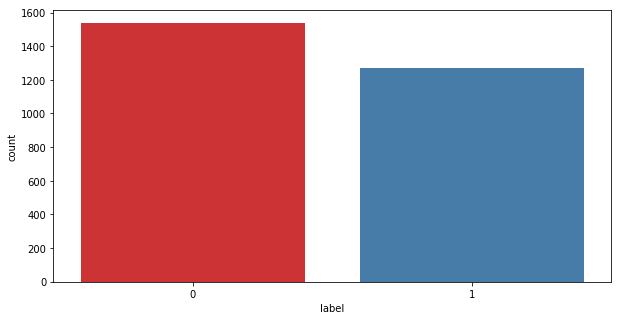

In [8]:
plt.figure(figsize = (10, 5))
chart = sns.countplot(df1['label'], 
                      palette="Set1"
                     )


In [9]:
def load_data(reviews_path):
    
    df2 = pd.read_csv(reviews_path)
    
    
    return df2

reviews_path = os.path.join(PROJ_ROOT, "data", "raw", "review.csv")
    
df2 = load_data(reviews_path) 

assert df2.shape == (460, 14)

In [10]:
df2.columns

Index(['review_id', 'user_id', 'book_id', 'author_id', 'review_text', 'review_rating', 'review_votes', 'spoiler_flag', 'spoiler_state', 'review_added_date', 'review_updated_date', 'review_read_count', 'comments_count', 'review_url'], dtype='object')

In [11]:
df2.head()

,review_id,user_id,book_id,author_id,review_text,review_rating,review_votes,spoiler_flag,spoiler_state,review_added_date,review_updated_date,review_read_count,comments_count,review_url
0,3200590976,62648565,51228520,18600770,Mihile was born blind and lives in an undergro...,5,0,False,none,Fri Feb 21 09:43:52 -0800 2020,Fri Feb 21 09:44:01 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590976
1,3200590529,69848315,51509350,16141984,"A fast insta-everything romance readLucy, a ma...",4,0,False,none,Fri Feb 21 09:43:26 -0800 2020,Fri Feb 21 09:50:59 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590529
2,3200590444,25556548,8366074,3472,"I love everything Margaret Atwood writes, not ...",5,0,False,none,Fri Feb 21 09:43:21 -0800 2020,Fri Feb 21 09:44:01 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590444
3,3200590370,108595664,9255439,4242779,the best,5,0,False,none,Fri Feb 21 09:43:17 -0800 2020,Fri Feb 21 09:43:38 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590370
4,3200589330,42360263,7927946,52349,"É inegável, sobretudo por conta do tempo e da ...",5,0,False,none,Fri Feb 21 09:42:21 -0800 2020,Fri Feb 21 09:42:59 -0800 2020,1,0,https://www.goodreads.com/review/show/3200589330


In [12]:
df2 = df2[['review_text', 'review_rating']]
df2.head()

,review_text,review_rating
0,Mihile was born blind and lives in an undergro...,5
1,"A fast insta-everything romance readLucy, a ma...",4
2,"I love everything Margaret Atwood writes, not ...",5
3,the best,5
4,"É inegável, sobretudo por conta do tempo e da ...",5


In [13]:
df2['review_rating'].value_counts()

5    211
4    131
3     58
0     26
2     20
1     14
Name: review_rating, dtype: int64

In [14]:
df2['label'] = np.where(df2['review_rating'] < 4, 0, 1)
df2.head()


,review_text,review_rating,label
0,Mihile was born blind and lives in an undergro...,5,1
1,"A fast insta-everything romance readLucy, a ma...",4,1
2,"I love everything Margaret Atwood writes, not ...",5,1
3,the best,5,1
4,"É inegável, sobretudo por conta do tempo e da ...",5,1


In [15]:
df2 = df2[['review_text', 'label']]

In [16]:

df2.head()

,review_text,label
0,Mihile was born blind and lives in an undergro...,1
1,"A fast insta-everything romance readLucy, a ma...",1
2,"I love everything Margaret Atwood writes, not ...",1
3,the best,1
4,"É inegável, sobretudo por conta do tempo e da ...",1


In [17]:
df2['text'] = df2['review_text']
df2.head()

,review_text,label,text
0,Mihile was born blind and lives in an undergro...,1,Mihile was born blind and lives in an undergro...
1,"A fast insta-everything romance readLucy, a ma...",1,"A fast insta-everything romance readLucy, a ma..."
2,"I love everything Margaret Atwood writes, not ...",1,"I love everything Margaret Atwood writes, not ..."
3,the best,1,the best
4,"É inegável, sobretudo por conta do tempo e da ...",1,"É inegável, sobretudo por conta do tempo e da ..."


In [18]:
df2 = df2 [['text', 'label']]
df2.head()

,text,label
0,Mihile was born blind and lives in an undergro...,1
1,"A fast insta-everything romance readLucy, a ma...",1
2,"I love everything Margaret Atwood writes, not ...",1
3,the best,1
4,"É inegável, sobretudo por conta do tempo e da ...",1


(array([0, 1]), <a list of 2 Text xticklabel objects>)

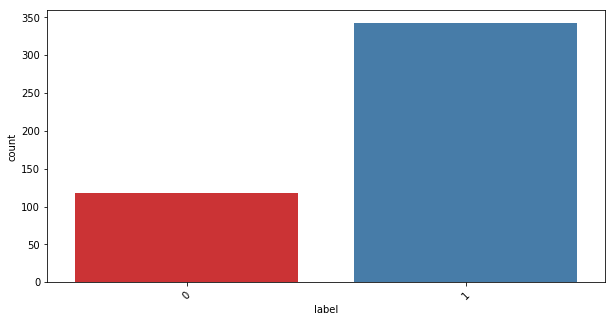

In [19]:
plt.figure(figsize = (10, 5))
chart = sns.countplot(df2['label'], 
                      palette="Set1"
                     )
plt.xticks(rotation = 45)

In [20]:
frames = [df1, df2]
df = pd.concat(frames)
df.shape

(3268, 2)

In [21]:
df.head()

,text,label
0,Fascinating view into the past: This book is f...,1
1,A very amusing look at the past: I was hoping ...,1
2,Didn't like...: I didn't like this version of ...,0
3,"Two Divas,that should shut up!: Here are two s...",0
4,Movie Version is Much better!: The movie versi...,0


In [22]:
df.tail()

,text,label
455,"A second chance story full of suspense, traged...",1
456,A lovely wordless picture book with endearing ...,1
457,I’m glad a gay writer won the Pulitzer for wri...,0
458,good world and interesting story but the chara...,0
459,"Sex, pairs of hands and love times 10Laura is ...",1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 0 to 459
Data columns (total 2 columns):
text     3268 non-null object
label    3268 non-null int64
dtypes: int64(1), object(1)
memory usage: 76.6+ KB


In [24]:
df.to_pickle("./reviews2.pkl")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

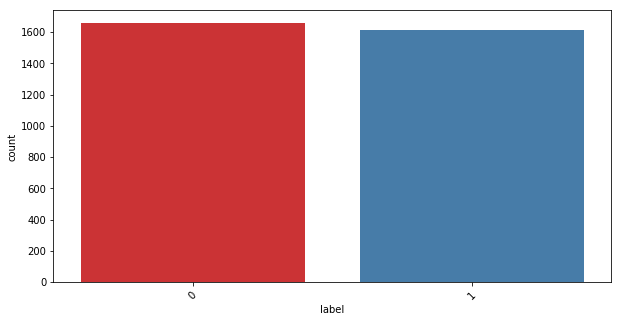

In [25]:
unpickled_df = pd.read_pickle("./reviews2.pkl")
plt.figure(figsize = (10, 5))
chart = sns.countplot(unpickled_df['label'], 
                      palette="Set1"
                     )
plt.xticks(rotation = 45)

In [26]:
unpickled_df['label'].value_counts()

0    1656
1    1612
Name: label, dtype: int64

In [27]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, r'[\d+\s<^>+@#\>]', ' ', replace_global=True)
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '', replace_global=True)

unpickled_df['text'] = custom_standardization(unpickled_df['text'])

In [28]:
unpickled_df

,text,label
0,b'fascinating view into the past this book is ...,1
1,b'a very amusing look at the past i was hoping...,1
2,b'didnt like i didnt like this version of the ...,0
3,b'two divasthat should shut up here are two so...,0
4,b'movie version is much better the movie versi...,0
5,b'the song is soulful u are one of the best si...,1
6,b'wuzzup mariah im kaligirl from seoul when yo...,1
7,b'new age the song is sung beautifully but is ...,0
8,b'when you believe this song sung by whitney h...,1
9,b'i really like this music because of the word...,1


In [29]:
def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.
    # Arguments
        sample_texts: list, sample texts.
    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

get_num_words_per_sample(unpickled_df['text'])

59.0

In [30]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

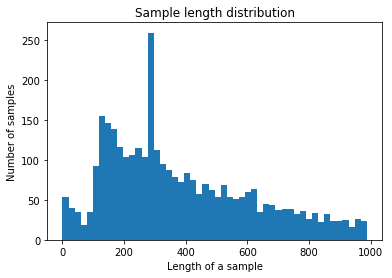

In [31]:
plot_sample_length_distribution(unpickled_df['text'])

In [32]:
unpickled_df.to_pickle("./reviews3.pkl")

# Bag of Words and Bernoulli Naive Bayes

In [33]:
from sklearn.feature_extraction.text import CountVectorizer


def make_features(unpickled_df, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words = 'english', max_df=0.5, ngram_range=(1, 3))
    x = vectorizer.fit_transform(unpickled_df['text'])
    y = unpickled_df['label']
    return x, y

x, y = make_features(unpickled_df)
  

In [34]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

clf = BernoulliNB()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.781855249745158

In [35]:
clf.feature_count_.shape

(2, 206266)